# Insta Research

In [4]:
# load libraries
# !pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load data
df = pd.read_csv('instagram_data.csv')

# check data
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


# EDA

In [19]:
# check for null values
print("=== NULL VALUES ===")
print(df.isnull().sum())

# Convert timestamp to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['day_of_week'] = df['created_at'].dt.day_name()
df['hour'] = df['created_at'].dt.hour
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year

# convert likes and comments to numeric vals also to avoid concatenation error
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

# Basic statistics
print("\n=== ENGAGEMENT STATISTICS ===")
print(f"Average likes: {df['likes'].mean():.2f}")
print(f"Median likes: {df['likes'].median():.2f}")
print(f"Max likes: {df['likes'].max()}")
print(f"Min likes: {df['likes'].min()}")
print(f"Average comments: {df['comments'].mean():.2f}")

# Engagement by day of week
print("\n=== ENGAGEMENT BY DAY OF WEEK ===")
day_engagement = df.groupby('day_of_week')['likes'].agg(['mean', 'median', 'count']).round(2)
print(day_engagement)

# Engagement by hour
print("\n=== ENGAGEMENT BY HOUR ===")
hour_engagement = df.groupby('hour')['likes'].agg(['mean', 'median', 'count']).round(2)
print(hour_engagement)

=== NULL VALUES ===
owner_id              0
owner_username        2
shortcode             2
is_video              2
caption             161
comments              3
likes                 3
created_at            3
location           7169
imageUrl              3
multiple_images       3
username           2115
followers          2115
following          2115
day_of_week           3
hour                  3
month                 3
year                  3
dtype: int64

=== ENGAGEMENT STATISTICS ===
Average likes: 32109.93
Median likes: 2250.00
Max likes: 12685879.0
Min likes: 0.0
Average comments: 415.78

=== ENGAGEMENT BY DAY OF WEEK ===
                 mean  median  count
day_of_week                         
Friday       22084.76  2033.0   1693
Monday       39452.91  2030.0   1669
Saturday     27182.61  2518.5   1424
Sunday       39645.29  2740.0   1669
Thursday     33679.87  2246.0   1794
Tuesday      34870.05  2156.0   1628
Wednesday    27610.62  2155.0   1812

=== ENGAGEMENT BY HOUR ===


In [17]:
# check df after converting created_at to datetime
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,day_of_week,hour,month,year
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268.0,16382.0,2024-03-01 20:59:18,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,Friday,20.0,3.0,2024.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138.0,9267.0,2024-02-29 21:10:48,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Thursday,21.0,2.0,2024.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089.0,10100.0,2024-02-28 21:11:47,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Wednesday,21.0,2.0,2024.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271.0,6943.0,2024-02-27 20:22:02,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Tuesday,20.0,2.0,2024.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145.0,17158.0,2024-02-23 20:01:26,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,Friday,20.0,2.0,2024.0


# Visualizations

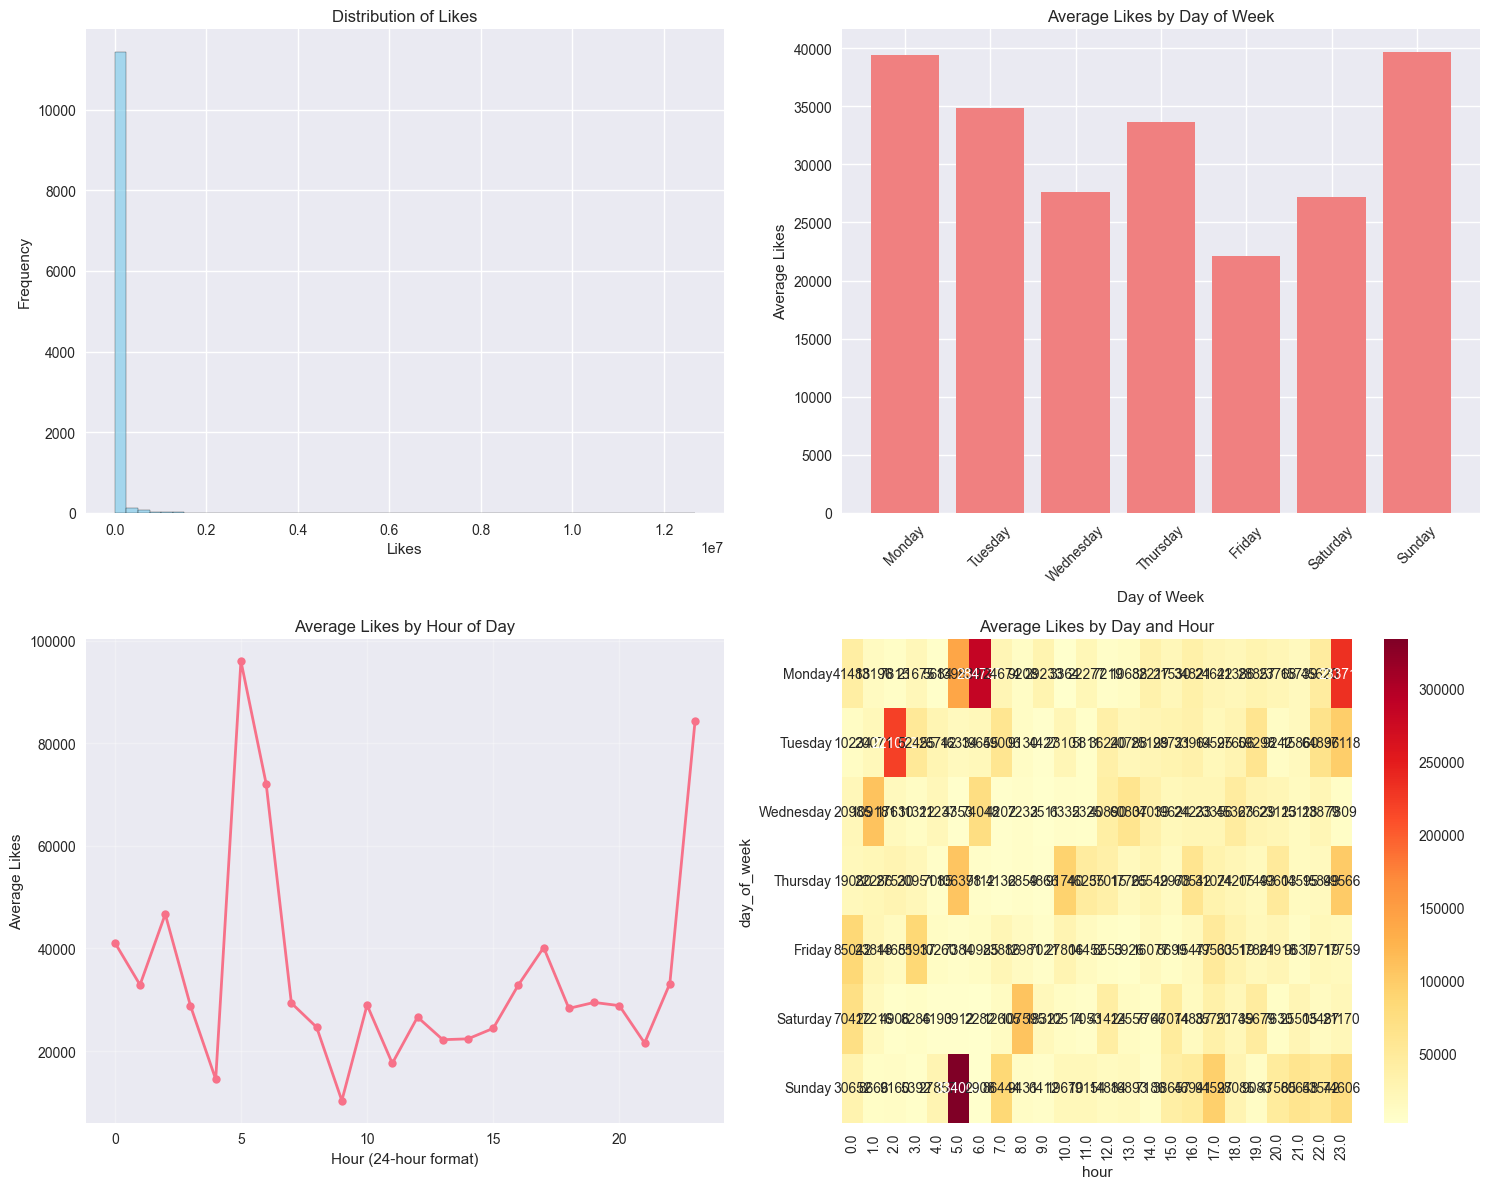

In [16]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Likes distribution
axes[0, 0].hist(df['likes'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Likes')
axes[0, 0].set_xlabel('Likes')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Engagement by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_means = df.groupby('day_of_week')['likes'].mean().reindex(day_order)
axes[0, 1].bar(day_means.index, day_means.values, color='lightcoral')
axes[0, 1].set_title('Average Likes by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Likes')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Engagement by hour
hour_means = df.groupby('hour')['likes'].mean()
axes[1, 0].plot(hour_means.index, hour_means.values, marker='o', linewidth=2, markersize=6)
axes[1, 0].set_title('Average Likes by Hour of Day')
axes[1, 0].set_xlabel('Hour (24-hour format)')
axes[1, 0].set_ylabel('Average Likes')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Heatmap of engagement by day and hour
pivot_table = df.pivot_table(values='likes', index='day_of_week', columns='hour', aggfunc='mean')
pivot_table = pivot_table.reindex(day_order)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Average Likes by Day and Hour')

plt.tight_layout()
plt.show()

# Advanced Analysis

In [ ]:
# Create engagement score (combine likes and comments)
df['engagement_score'] = df['likes'] + (df['comments'] * 2)  # Weight comments more heavily

# Find optimal posting times
print("=== OPTIMAL POSTING TIMES ANALYSIS ===")

# By day of week
best_day = df.groupby('day_of_week')['engagement_score'].mean().idxmax()
print(f"Best day to post: {best_day}")

# By hour
best_hour = df.groupby('hour')['engagement_score'].mean().idxmax()
print(f"Best hour to post: {best_hour}:00")

# By day and hour combination
best_day_hour = df.groupby(['day_of_week', 'hour'])['engagement_score'].mean().idxmax()
print(f"Best day and hour to post: {best_day_hour[0]} at {best_day_hour[1]}:00")

# Additional insights
print(f"\n=== ADDITIONAL INSIGHTS ===")
print(f"Posts with followers > median: {df[df['followers'] > df['followers'].median()]['likes'].mean():.2f} avg likes")
print(f"Posts with followers <= median: {df[df['followers'] <= df['followers'].median()]['likes'].mean():.2f} avg likes")
print(f"Video posts: {df[df['is_video']]['likes'].mean():.2f} avg likes")
print(f"Image posts: {df[~df['is_video']]['likes'].mean():.2f} avg likes")

# Model Building

In [ ]:
# Prepare features for modeling
df_model = df.copy()
df_model['day_encoded'] = pd.Categorical(df_model['day_of_week']).codes
df_model['is_weekend'] = df_model['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df_model['is_business_hours'] = ((df_model['hour'] >= 9) & (df_model['hour'] <= 17)).astype(int)

# Simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features for the model
X = df_model[['day_encoded', 'hour', 'is_weekend', 'is_business_hours', 'followers']]
y = df_model['engagement_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"=== MODEL PERFORMANCE ===")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
print(f"\nFeature Importance:")
print(feature_importance.sort_values('coefficient', key=abs, ascending=False))

# Final Recommendations

In [ ]:
# Generate final recommendations
print("=== POSTING RECOMMENDATIONS ===")
print(f"1. Best day: {best_day}")
print(f"2. Best hour: {best_hour}:00")
print(f"3. Best combination: {best_day_hour[0]} at {best_day_hour[1]}:00")
print(f"4. Weekend vs Weekday: {'Weekend' if df_model.groupby('is_weekend')['engagement_score'].mean().idxmax() == 1 else 'Weekday'} posts perform better")
print(f"5. Business hours vs Off-hours: {'Business hours' if df_model.groupby('is_business_hours')['engagement_score'].mean().idxmax() == 1 else 'Off-hours'} posts perform better")

# Create optimal posting schedule
print(f"\n=== OPTIMAL POSTING SCHEDULE ===")
print(f"Primary time: {best_day_hour[0]} at {best_day_hour[1]}:00")
print(f"Secondary time: {best_day} at {best_hour}:00")

# Show top 5 best posting times
top_times = df.groupby(['day_of_week', 'hour'])['engagement_score'].mean().sort_values(ascending=False).head(5)
print(f"\nTop 5 posting times:")
for i, ((day, hour), score) in enumerate(top_times.items(), 1):
    print(f"{i}. {day} at {hour}:00 - Avg engagement: {score:.0f}")